# Python pour la science des données -- Partie 2: La librairie scikit-learn

Matériel de cours rédigé par Pascal Germain, 2018
*********************

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

Télécharger d'abord les données *MNIST* à partir de ce lien:

https://drive.google.com/drive/folders/1SW6Q9x4QOVcOZ57THpc2sM5ZsdCMMjyV?usp=sharing

Indiquez le (sous-)répertoire où se trouvent les fichiers sur votre ordinateur à l'aide de la variable suivante.

In [ ]:
repertoire_mnist = 'mnist/' # Modifier le répertoire au besoin

Pour commencer, nous travaillerons dans un contexte de *classification binaire*, en apprenant à distinguer des images de `2` et des images `3`. Chargeons les données et créons l'ensemble d'apprentissage.

In [ ]:
images2 = np.loadtxt(repertoire_mnist + 'mnist_2.gz')
images3 = np.loadtxt(repertoire_mnist + 'mnist_3.gz')
print('images2:', images2.shape)
print('images3:', images3.shape)

In [ ]:
images2[0]

In [ ]:
im2 = images2[0].reshape(28,28)
plt.imshow(im2, cmap=plt.cm.gray)
plt.colorbar()

In [ ]:
im3 = images3[0].reshape(28,28)
plt.imshow(im3, cmap=plt.cm.gray)
plt.colorbar()

In [ ]:
data_x = np.vstack([images2, images3])
data_x.shape

In [ ]:
data_y = np.ones(data_x.shape[0])
data_y[:images2.shape[0]] = 0
data_y.shape

### Séparation des données en un ensemble d'apprentissage et un ensemble de test

Voir: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=10000, random_state=42)
print('train_x:', train_x.shape)
print('test_x:', test_x.shape)
print('train_y:', train_y.shape)
print('test_y:', test_y.shape)

In [ ]:
train_y[0:100]

### Algorithme d'apprentissage (Exemple de la régression logistique)

Voir: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [ ]:
from sklearn.linear_model import LogisticRegression

**Étape 1:** Initialiser l'algorithme d'apprentissage (constructeur de la *classe*).

In [ ]:
LogisticRegression?

In [ ]:
predicteur = LogisticRegression(C=.1)

**Étape 2:** Exécuter l'algorithme sur les données d'apprentissage (méthode `fit`).

In [ ]:
predicteur.fit?

In [ ]:
predicteur.fit(train_x, train_y)

**Étape 3:** Prédire sur des nouvelles données (méthode `predict`).

In [ ]:
predicteur.predict?

In [ ]:
predictions = predicteur.predict(test_x[0:100,:])
predictions

*Regardons quelques erreurs de classifications*

In [ ]:
echecs = np.nonzero(predicteur.predict(test_x[0:100,:]) != test_y[0:100])
echecs

In [ ]:
fig, axes = plt.subplots(1, len(echecs[0]), figsize=(10, 4))
for i, ax in zip(echecs[0], axes):
    ax.imshow(test_x[i].reshape(28,28), cmap=plt.cm.gray)

### Évaluer la performance d'un algorithme d'apprentissage

Voir: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score?

In [ ]:
predicteur = LogisticRegression(C=1)
predicteur.fit(train_x, train_y)
train_pred = predicteur.predict(train_x)
test_pred = predicteur.predict(test_x)
print('Précision train:', accuracy_score(train_y, train_pred) )
print('Précision test :', accuracy_score(test_y, test_pred))

Essayons avec un autre paramètre $C$.

In [ ]:
predicteur = LogisticRegression(C=.1)
predicteur.fit(train_x, train_y)
train_pred = predicteur.predict(train_x)
test_pred = predicteur.predict(test_x)
print('Précision train:', accuracy_score(train_y, train_pred) )
print('Précision test :', accuracy_score(test_y, test_pred))

### Pré-traitement des données

Voir: http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
StandardScaler?

In [ ]:
scaler = StandardScaler()
scaler.fit(train_x)
train_x_prime = scaler.transform(train_x)
test_x_prime = scaler.transform(test_x)

In [ ]:
i = 1
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
cax = axes[1].imshow(train_x[i].reshape(28,28), cmap=plt.cm.gray)
fig.colorbar(cax, ax=axes[1])
cax = axes[0].imshow(train_x_prime[i].reshape(28,28), cmap=plt.cm.gray)
fig.colorbar(cax, ax=axes[0]);

In [ ]:
predicteur = LogisticRegression(C=0.1)
predicteur.fit(train_x_prime, train_y)
train_pred = predicteur.predict(train_x_prime)
test_pred = predicteur.predict(test_x_prime)
print('Précision train:', accuracy_score(train_y, train_pred) )
print('Précision test :', accuracy_score(test_y, test_pred))

### Sélections de modèle par validation croisée

Voir: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
C_space = np.logspace(-4,4,10)
parametres = {'C':C_space}
parametres

In [ ]:
predicteur = LogisticRegression()
predicteur_CV = GridSearchCV(predicteur, parametres, n_jobs=4, return_train_score=False)
predicteur_CV.fit(train_x_prime, train_y)

In [ ]:
train_pred = predicteur_CV.predict(train_x_prime)
test_pred = predicteur_CV.predict(test_x_prime)

print('Précision train:', accuracy_score(train_y, train_pred) )
print('Précision test :', accuracy_score(test_y, test_pred))
print('Paramètres sélectionnés par la validation croisée :', predicteur_CV.best_params_)

In [ ]:
cv_results = predicteur_CV.cv_results_
predicteur_CV.cv_results_.keys()

In [ ]:
from pandas import DataFrame
DataFrame(cv_results)

In [ ]:
plt.semilogx(cv_results['param_C'], cv_results['mean_test_score'])

### Essayons avec un autre algorithme d'apprentissage (SVM)

Voir: http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [ ]:
from sklearn.svm import SVC

In [ ]:
SVC?

In [ ]:
predicteur = SVC(C=1.0, gamma='auto')
predicteur.fit(train_x_prime, train_y)
train_pred = predicteur.predict(train_x_prime)
test_pred = predicteur.predict(test_x_prime)
accuracy_score(train_y, train_pred) , accuracy_score(test_y, test_pred)
print('Précision train:', accuracy_score(train_y, train_pred) )
print('Précision test :', accuracy_score(test_y, test_pred))

In [49]:
# ATTENTION: L'exécution de cette cellule de code devrait prendre un certain temps...
C_space = np.logspace(-3, 3, 6)
gamma_space = np.logspace(-5, -1, 6)
parametres = {'C':C_space, 'gamma':gamma_space}

predicteur = SVC()
predicteur_CV = GridSearchCV(predicteur, parametres, n_jobs=4, return_train_score=False)
predicteur_CV.fit(train_x_prime, train_y)

train_pred = predicteur_CV.predict(train_x_prime)
test_pred = predicteur_CV.predict(test_x_prime)
print('Précision train:', accuracy_score(train_y, train_pred) )
print('Précision test :', accuracy_score(test_y, test_pred))
print('Paramètres sélectionnés par la validation croisée :', predicteur_CV.best_params_)

Précision train: 1.0
Précision test : 0.9841
Paramètres sélectionnés par la validation croisée : {'C': 63.0957344480193, 'gamma': 0.00039810717055349735}


In [50]:
cv_results = predicteur_CV.cv_results_
DataFrame(cv_results)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,6.639713,0.010503,2.967470,0.000288,0.001,1e-05,"{'C': 0.001, 'gamma': 1e-05}",0.519594,0.519971,0.519622,0.519729,0.000172,23
1,6.630760,0.027865,2.975952,0.007367,0.001,6.30957e-05,"{'C': 0.001, 'gamma': 6.309573444801929e-05}",0.519594,0.519971,0.519622,0.519729,0.000172,23
2,6.698654,0.107956,3.086750,0.143590,0.001,0.000398107,"{'C': 0.001, 'gamma': 0.00039810717055349735}",0.519594,0.519971,0.519622,0.519729,0.000172,23
3,6.715760,0.007731,3.291137,0.004309,0.001,0.00251189,"{'C': 0.001, 'gamma': 0.002511886431509582}",0.519594,0.519971,0.519622,0.519729,0.000172,23
4,7.013416,0.011911,3.415716,0.009348,0.001,0.0158489,"{'C': 0.001, 'gamma': 0.01584893192461114}",0.519594,0.519971,0.519622,0.519729,0.000172,23
5,7.050870,0.029745,3.414744,0.012930,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.519594,0.519971,0.519622,0.519729,0.000172,23
6,7.303391,0.050846,3.414362,0.023014,0.0158489,1e-05,"{'C': 0.015848931924611134, 'gamma': 1e-05}",0.519594,0.519971,0.519622,0.519729,0.000172,23
7,7.324975,0.007679,3.395477,0.003208,0.0158489,6.30957e-05,"{'C': 0.015848931924611134, 'gamma': 6.3095734...",0.519594,0.519971,0.519622,0.519729,0.000172,23
8,6.608465,0.018978,3.168122,0.008193,0.0158489,0.000398107,"{'C': 0.015848931924611134, 'gamma': 0.0003981...",0.927431,0.920116,0.937500,0.928347,0.007125,16
9,6.169428,0.039546,2.937692,0.013884,0.0158489,0.00251189,"{'C': 0.015848931924611134, 'gamma': 0.0025118...",0.883890,0.866376,0.895349,0.881869,0.011912,17


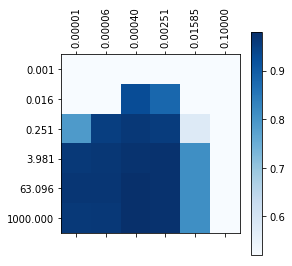

In [51]:
nb_gamma = len(gamma_space)
nb_C = len(C_space)
plt.matshow(cv_results['mean_test_score'].reshape((nb_C,nb_gamma)), cmap='Blues') 
plt.xticks(np.arange(nb_gamma), ["%.5f" % g for g in gamma_space], rotation=90)
plt.yticks(np.arange(nb_C), ["%.3f" % c for c in C_space])
plt.colorbar()